# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# **Feature Name Informations**

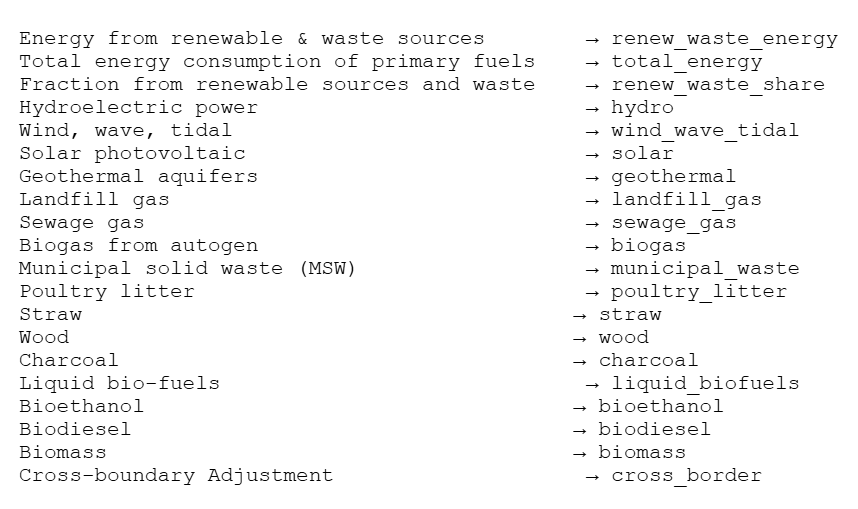


# DATA LOADING


In [ ]:
df = pd.read_csv('/content/myData1.csv', sep=";", encoding="utf-8")
print(df)

    year  renew_waste_energy  total_energy  renew_waste_share  hydro  \
0   1990               1.647       225.532              0.007  0.448   
1   1991               1.634       231.288              0.007  0.398   
2   1992               1.843       228.696              0.008  0.467   
3   1993               1.862       231.368              0.008  0.370   
4   1994               2.528       230.739              0.011  0.438   
5   1995               2.644       230.886              0.011  0.416   
6   1996               2.581       243.392              0.011  0.292   
7   1997               2.611       240.756              0.011  0.378   
8   1998               3.013       246.790              0.012  0.440   
9   1999               3.148       246.112              0.013  0.459   
10  2000               3.164       248.037              0.013  0.437   
11  2001               3.270       252.807              0.013  0.348   
12  2002               3.575       244.980              0.015  0

In [ ]:
print(f"Dataset shape: {df.shape}")
print(df[['year', 'renew_waste_energy', 'total_energy', 'GDP_growth']].head())

Dataset shape: (31, 22)
   year  renew_waste_energy  total_energy  GDP_growth
0  1990               1.647       225.532         0.8
1  1991               1.634       231.288        -1.3
2  1992               1.843       228.696         1.3
3  1993               1.862       231.368         3.5
4  1994               2.528       230.739         5.0


# The First 5 Rows of Data

In [ ]:
df.head()

,year,renew_waste_energy,total_energy,renew_waste_share,hydro,wind_wave_tidal,solar,geothermal,landfill_gas,sewage_gas,...,poultry_litter,straw,wood,charcoal,liquid_biofuels,bioethanol,biodiesel,biomass,cross_border,GDP_growth
0,1990,1.647,225.532,0.007,0.448,0.001,0.0,0.001,0.080,0.138,...,0.000,0.007,0.687,0.039,0.0,0.0,0.0,0.065,0.0,0.8
1,1991,1.634,231.288,0.007,0.398,0.001,0.0,0.001,0.105,0.151,...,0.000,0.007,0.687,0.036,0.0,0.0,0.0,0.065,0.0,-1.3
2,1992,1.843,228.696,0.008,0.467,0.003,0.0,0.001,0.155,0.151,...,0.016,0.007,0.736,0.033,0.0,0.0,0.0,0.065,0.0,1.3
3,1993,1.862,231.368,0.008,0.370,0.019,0.0,0.001,0.162,0.158,...,0.043,0.007,0.736,0.034,0.0,0.0,0.0,0.065,0.0,3.5
4,1994,2.528,230.739,0.011,0.438,0.030,0.0,0.001,0.188,0.170,...,0.101,0.007,1.108,0.034,0.0,0.0,0.0,0.065,0.0,5.0


# The Last 5 Rows of Data

In [ ]:
df.tail()

,year,renew_waste_energy,total_energy,renew_waste_share,hydro,wind_wave_tidal,solar,geothermal,landfill_gas,sewage_gas,...,poultry_litter,straw,wood,charcoal,liquid_biofuels,bioethanol,biodiesel,biomass,cross_border,GDP_growth
26,2016,16.750,202.261,0.083,0.46,3.195,0.894,0.001,1.556,0.387,...,0.227,0.247,4.164,0.053,0.001,0.452,0.586,1.365,0.009,2.2
27,2017,18.656,197.273,0.095,0.51,4.268,0.985,0.001,1.419,0.398,...,0.216,0.261,4.236,0.089,0.001,0.452,0.574,1.751,0.009,3.0
28,2018,21.034,198.125,0.106,0.47,4.893,1.089,0.001,1.298,0.407,...,0.214,0.259,4.913,0.107,0.000,0.445,0.939,2.071,0.013,1.6
29,2019,22.871,192.500,0.119,0.50,5.485,1.082,0.001,1.202,0.434,...,0.222,0.335,5.370,0.068,0.000,0.443,1.319,2.121,0.018,1.3
30,2020,24.472,169.439,0.144,0.58,6.481,1.131,0.001,1.160,0.440,...,0.223,0.338,5.478,0.074,0.000,0.359,1.335,2.469,0.017,-10.0


# Data Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                31 non-null     int64  
 1   renew_waste_energy  31 non-null     float64
 2   total_energy        31 non-null     float64
 3   renew_waste_share   31 non-null     float64
 4   hydro               31 non-null     float64
 5   wind_wave_tidal     31 non-null     float64
 6   solar               31 non-null     float64
 7   geothermal          31 non-null     float64
 8   landfill_gas        31 non-null     float64
 9   sewage_gas          31 non-null     float64
 10  biogas              31 non-null     float64
 11  municipal_waste     31 non-null     float64
 12  poultry_litter      31 non-null     float64
 13  straw               31 non-null     float64
 14  wood                31 non-null     float64
 15  charcoal            31 non-null     float64
 16  liquid_bio

# **EDA**

# GDP Growth over Years Graph

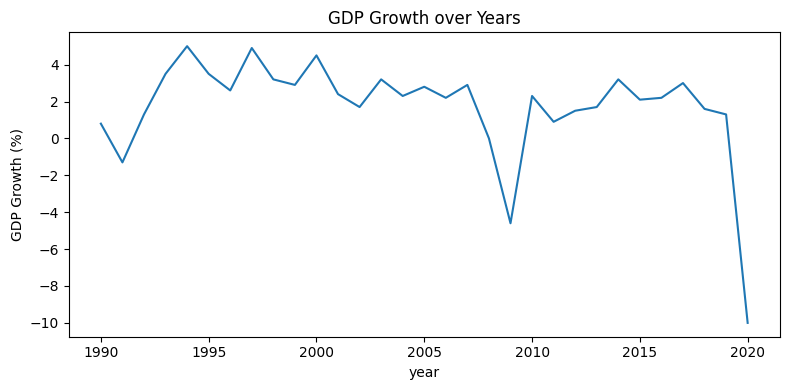

In [ ]:
# GDP Trend
plt.figure(figsize=(8,4))
plt.plot(df['year'], df['GDP_growth'])
plt.xlabel("year")
plt.ylabel("GDP Growth (%)")
plt.title("GDP Growth over Years")
plt.tight_layout()
plt.show()

# Renewable & Waste Energy over Years Graph

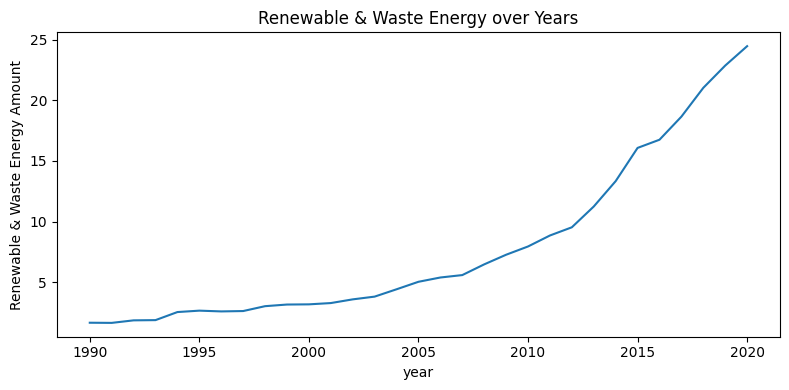

In [ ]:
# Renewable & Waste Energy Trend
plt.figure(figsize=(8,4))
plt.plot(df['year'], df['renew_waste_energy'])
plt.xlabel("year")
plt.ylabel("Renewable & Waste Energy Amount")
plt.title("Renewable & Waste Energy over Years")
plt.tight_layout()
plt.show()


# GDP Growth and Renewable & Waste Energy Over Years Graph

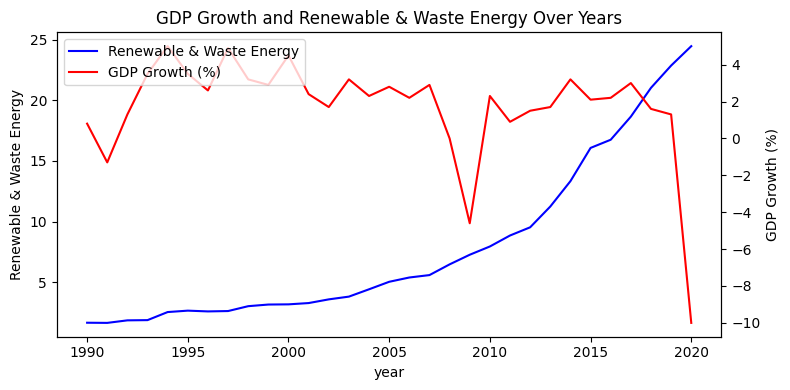

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.plot(df['year'], df['renew_waste_energy'], color='blue', label='Renewable & Waste Energy')
ax1.set_xlabel("year")
ax1.set_ylabel("Renewable & Waste Energy")

ax2 = ax1.twinx()
ax2.plot(df['year'], df['GDP_growth'], color='red', label='GDP Growth (%)')
ax2.set_ylabel("GDP Growth (%)")

plt.title("GDP Growth and Renewable & Waste Energy Over Years")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()


# Stacked Area Plot of All Energy Types

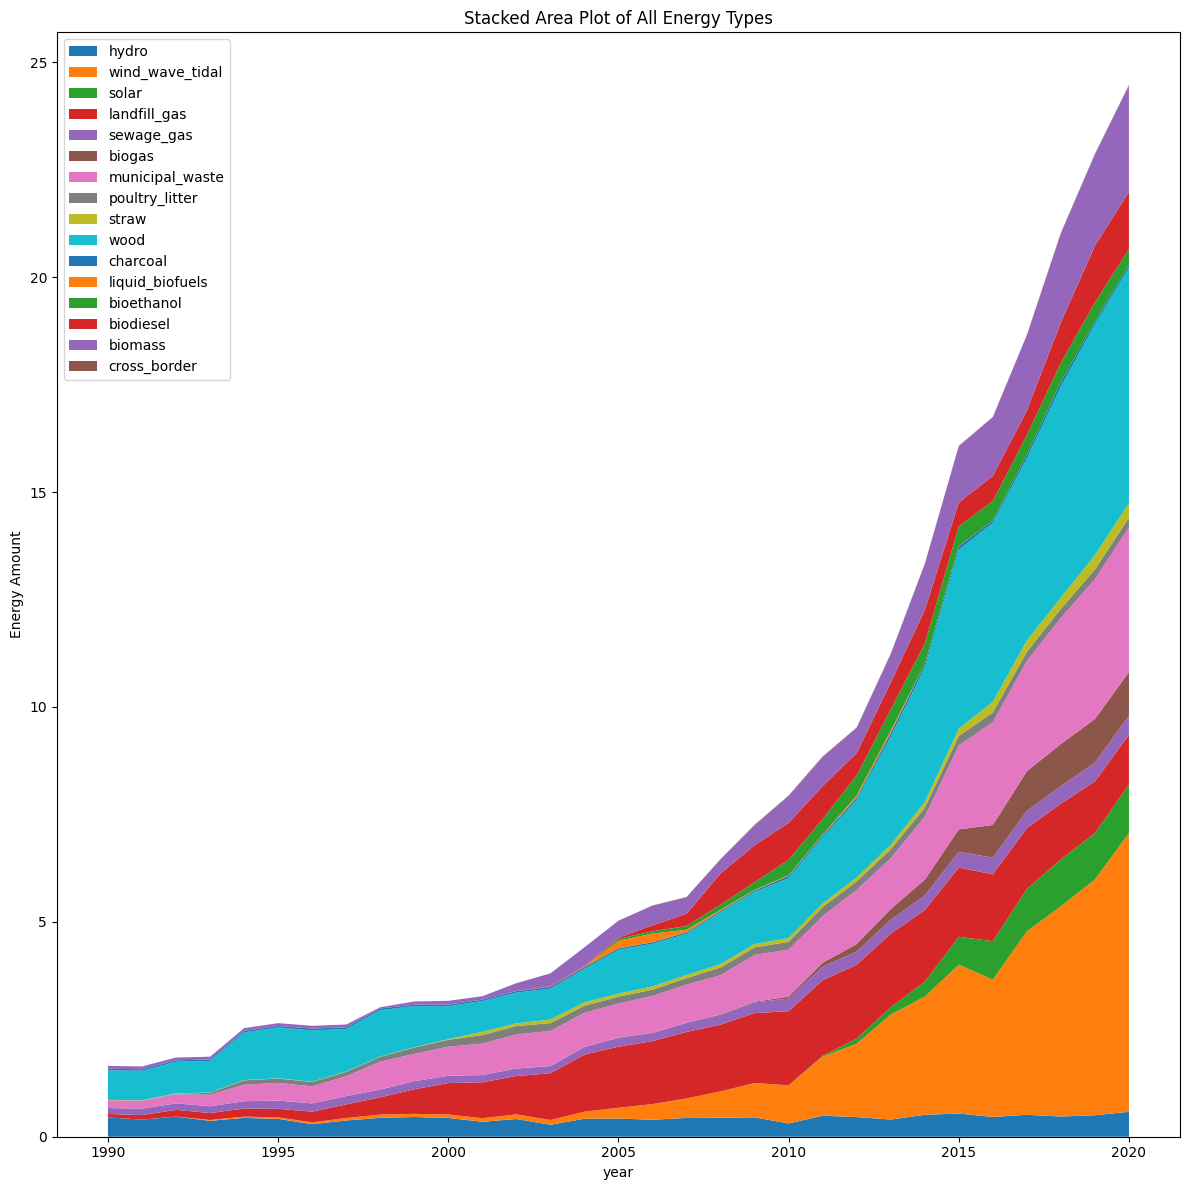

In [ ]:
energy_cols = [
    'hydro','wind_wave_tidal','solar','landfill_gas','sewage_gas',
    'biogas','municipal_waste','poultry_litter','straw','wood','charcoal',
    'liquid_biofuels','bioethanol','biodiesel','biomass','cross_border'
]

year = df["year"]
new_transpose_stack = df[energy_cols].T.values
new_index = energy_cols


fig = plt.figure(figsize=(12,12))
plt.stackplot(year, new_transpose_stack, labels=new_index)
plt.xlabel("year")
plt.ylabel("Energy Amount")
plt.title("Stacked Area Plot of All Energy Types")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


# **CORRELATION MATRIX**

**Deleting the geothermal column**

In [ ]:
df.drop(columns=['geothermal'], inplace=True)

# Defining the feature and target

In [ ]:
features = [
    'renew_waste_energy','total_energy','renew_waste_share','hydro',
    'wind_wave_tidal','solar','landfill_gas','sewage_gas',
    'biogas','municipal_waste','poultry_litter','straw','wood','charcoal',
    'liquid_biofuels','bioethanol','biodiesel','biomass','cross_border'
]

target = 'GDP_growth'

X = df[features]
y = df[target]

# Correlation Heatmap

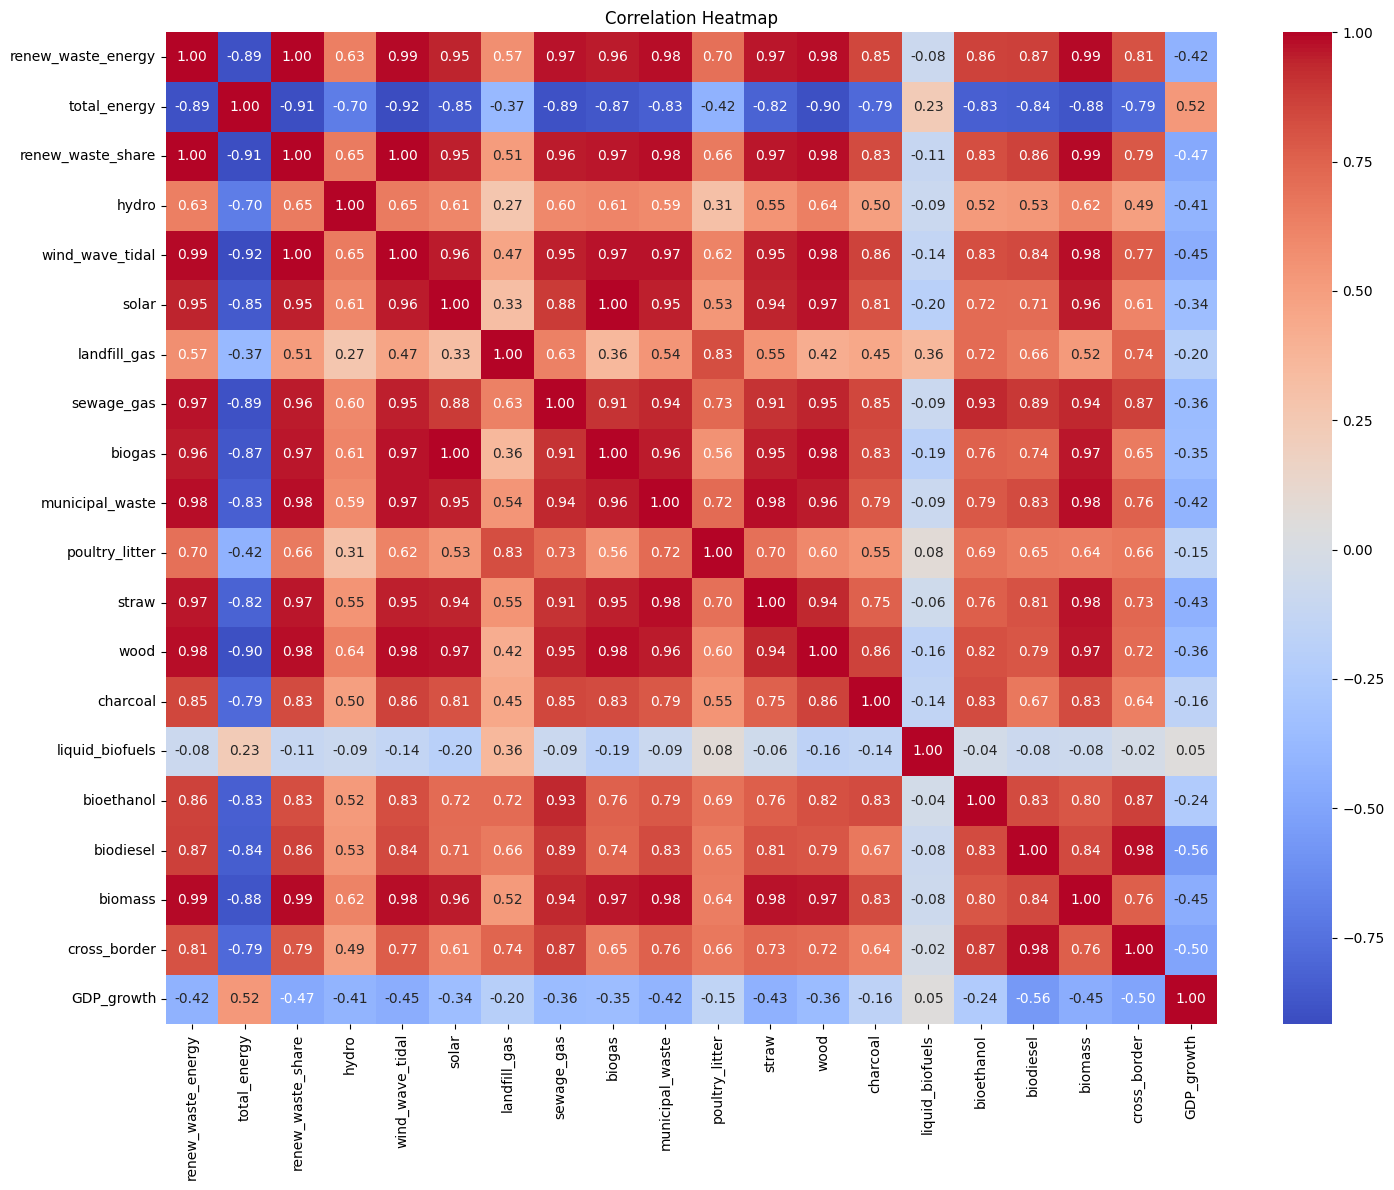


Correlation with GDP growth:
GDP_growth            1.000000
total_energy          0.521246
liquid_biofuels       0.051857
poultry_litter       -0.147673
charcoal             -0.164703
landfill_gas         -0.200579
bioethanol           -0.241421
solar                -0.344431
biogas               -0.348278
wood                 -0.355938
sewage_gas           -0.361647
hydro                -0.410439
municipal_waste      -0.415018
renew_waste_energy   -0.419603
straw                -0.429475
biomass              -0.446762
wind_wave_tidal      -0.452467
renew_waste_share    -0.470585
cross_border         -0.498649
biodiesel            -0.562814
Name: GDP_growth, dtype: float64


In [ ]:
corr = df[features + [target]].corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

print("\nCorrelation with GDP growth:")
print(corr['GDP_growth'].sort_values(ascending=False))

# TRAIN–TEST SPLIT

In [ ]:
df = df.sort_values("year")


X = df[features]
y = df[target]


split_year = 2015

X_train = X[df["year"] <= split_year]
X_test  = X[df["year"] > split_year]

y_train = y[df["year"] <= split_year]
y_test  = y[df["year"] > split_year]

print("Train samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])


Train samples: 26
Test samples: 5


# StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Importing Models

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}


# Model Performance Comparison

In [ ]:
print("MODEL PERFORMANCE COMPARISON:\n")

results = {}

for name, model in models.items():

    # scale only for linear model / boosting
    if name == "Random Forest":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

    print(f"{name}:")
    print(f"  MAE:  {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2:   {r2:.4f}")

MODEL PERFORMANCE COMPARISON:

Linear Regression:
  MAE:  10.3414
  RMSE: 11.9372
  R2:   -5.0705
Random Forest:
  MAE:  2.6751
  RMSE: 4.4758
  R2:   0.1466
Gradient Boosting:
  MAE:  2.4570
  RMSE: 4.9381
  R2:   -0.0388


# Selecting The Best Model

In [ ]:
best_model_name = max(results, key=lambda n: results[n]["R2"])
best_model = models[best_model_name]

print(f"\nBest performing model: {best_model_name}")

# retrain using full data
best_model.fit(X, y)


Best performing model: Random Forest


RandomForestRegressor(n_estimators=300, random_state=42)

# Model-Based Feature Importance


Top contributing features:

cross_border          0.110198
biodiesel             0.095737
total_energy          0.078327
wood                  0.078203
sewage_gas            0.072672
hydro                 0.069767
charcoal              0.068716
renew_waste_energy    0.059245
straw                 0.056026
municipal_waste       0.052141
dtype: float64


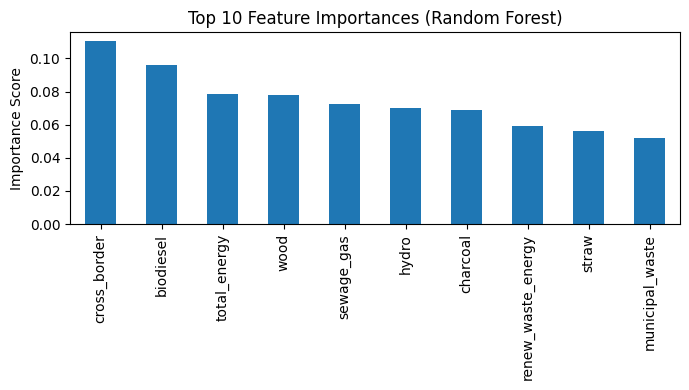

In [ ]:
if best_model_name in ["Random Forest", "Gradient Boosting"]:
    importances = best_model.feature_importances_
    importance_series = pd.Series(importances, index=features).sort_values(ascending=False)

    print("\nTop contributing features:\n")
    print(importance_series.head(10))

    plt.figure(figsize=(7,4))
    importance_series.head(10).plot(kind="bar")
    plt.title(f"Top 10 Feature Importances ({best_model_name})")
    plt.ylabel("Importance Score")
    plt.tight_layout()
    plt.show()

# Model Performance Graph

                         MAE       RMSE        R2
Linear Regression  10.341411  11.937152 -5.070462
Random Forest       2.675067   4.475819  0.146575
Gradient Boosting   2.457016   4.938054 -0.038800


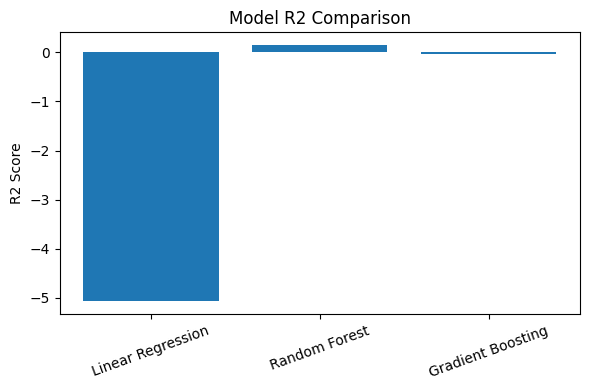

In [ ]:
# --- MODEL PERFORMANCE GRAPH ---
results_df = pd.DataFrame(results).T

print(results_df)


plt.figure(figsize=(6,4))
plt.bar(results_df.index, results_df["R2"])
plt.ylabel("R2 Score")
plt.title("Model R2 Comparison")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()
